<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 2
#### Lugano Damian


## Consigna

<img src="./Circuito.png" align="center" width="1020" /> 

Consignas de la actividad:

👉  Hallar la transferencia T=VoVi
 en función de ωo
 y Q
.

👉  Obtener el valor de los componentes del circuito de forma tal que ωo=1
 y Q=3

👉  Ajustar el valor de R1
 de forma tal que |T(0)|=20dB
.

Bonus:

+10 💎 Obtener los valores de la red normalizados en frecuencia e impedancia.

+10 🎓 Calcular las sensibilidades  SωoC
, SQR2
 y SQR3
 
+10 🤯 Recalcular los valores de la red para que cumpla con una transferencia Butterworth.

+10  🎸 Cómo podría obtener un circuito pasabanda con los mismos componentes originales y con qué parámetros 
quedaría diseñado (Ver ejemplo 4.6 en Schaumann).

+10  ⚽️ Simulación circuital de todos los experimentos.

+10  🍺 Presentación en jupyter notebook

## Resolución

### Puntos 1, 2 y 3 + 1er Bonus

A continuación se adjunta el pdf con la resolución:

In [1]:
from IPython.display import IFrame
IFrame("./TS2_LuganoDamian.pdf", width=950, height=1000)

## Bonus

A continuación se adjuntan las resoluciones de los puntos bonus en pdf:

In [2]:
from IPython.display import IFrame
IFrame("./TS2_Bonus_LuganoDamian.pdf", width=950, height=1000)

## Simulación circuital

Se simuló la transferencia en python de los filtros analizados teoricamente


In [3]:
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

#Red normalizada
R1=1/10
R2=[3, 1/np.sqrt(2)]
R3=1 #Norma de impedancia
C=1

w0=1/C*R3 #Frecuencia normalizada -> Norma de frec wo=1/(C*R3)
Q=[C*R2[0], C*R2[1]]

K=1/((C**2)*R1*R3)

plt.close('all')


### Filtro pasa bajos con Q=3

Se hizo una simulación en LTspice del filtro pasabajos con Q=3 y se obtuvieron los siguientes gráficos:

<img src="./LTspicesch.png" align="center" width="1020" /> 
<img src="./LTspiceMOD.png" align="center" width="1020" /> 

Notar que el eje x del simulador está en frecuencia. Sin embargo se puede observar que el pico de +30dB está en $\omega_0=2\pi 160mHz=1rad/s$. Esto podría solucionarse parametrizando en funcion de $\omega$ a todos los componentes, lo cual será implementado para la proxima tarea semanal. 

Por otro lado la simulación en Python arrojó los siguientes resultados:

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

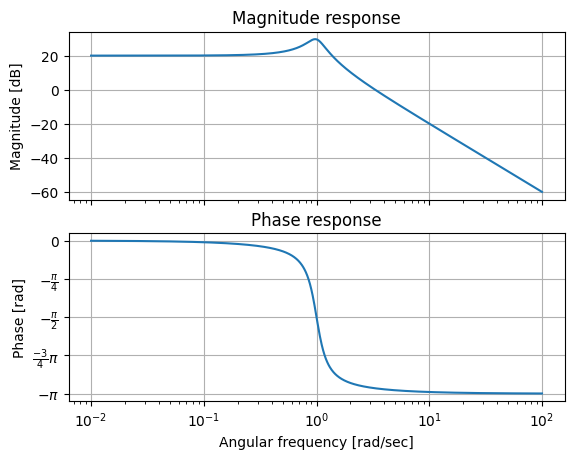

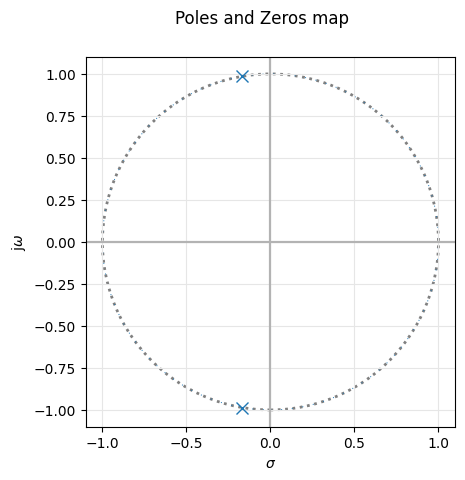

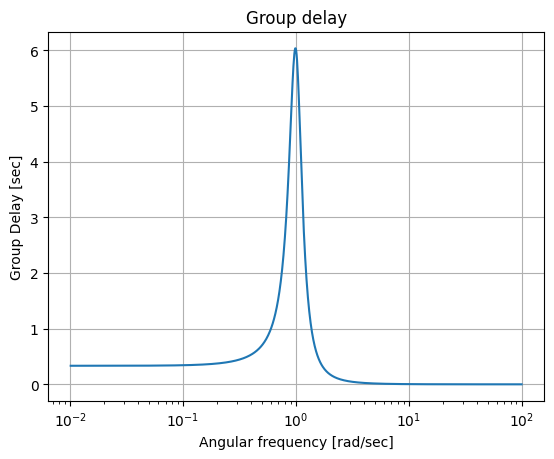

In [4]:
#Filtro Pasabajo generico con Q=3 y w0=1
TFPB=TransferFunction([K], [1, w0/Q[0], w0**2])
bodePlot(TFPB, fig_id=1)
pzmap(TFPB, fig_id=2 )
GroupDelay(TFPB, fig_id=3)

## Butterworth de 2do orden 

De lo calculado teoricamente se simuló el circuito resultante en LTspice y se obtuvieron los siguientes resultados:

<img src="./LTspicebutter.png" align="center" width="1020" /> 
<img src="./LTspiceButterg.png" align="center" width="1020" /> 

Por otro lado la simulación en python arrojó los siguientes gráficos:

(7,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

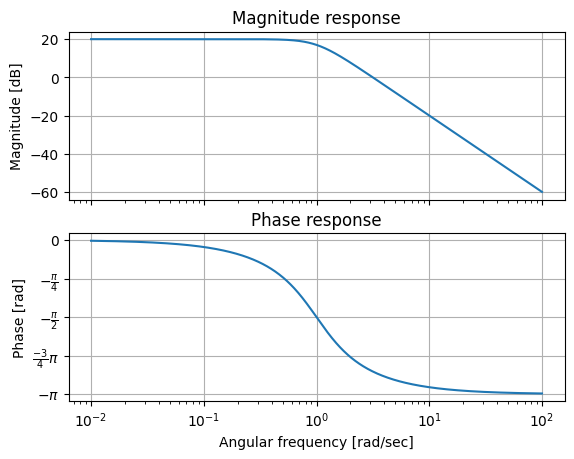

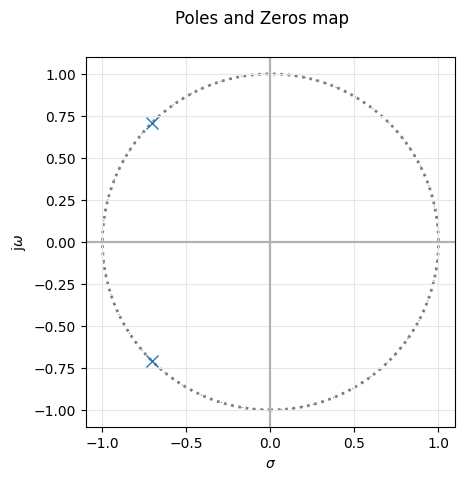

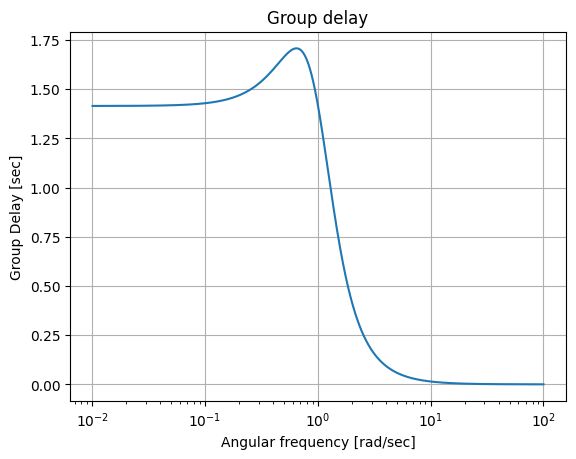

In [5]:
#Filtro Butterworth de segundo orden
TFPBbut=TransferFunction([K], [1, w0/Q[1], w0**2])
bodePlot(TFPBbut, fig_id=5)
pzmap(TFPBbut, fig_id=6 )
GroupDelay(TFPBbut, fig_id=7)

## Filtro pasa banda con Q=3

La simulación circuital en LTspice del circuito pasa banda arrojó los siguientes gráficos:

<img src="./LTspiceFPBsch.png" align="center" width="1020" /> 
<img src="./LTspiceFPB.png" align="center" width="1020" /> 

Por otro lado, de la simulación en python se obtuvieron los siguientes resultados:

(10,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

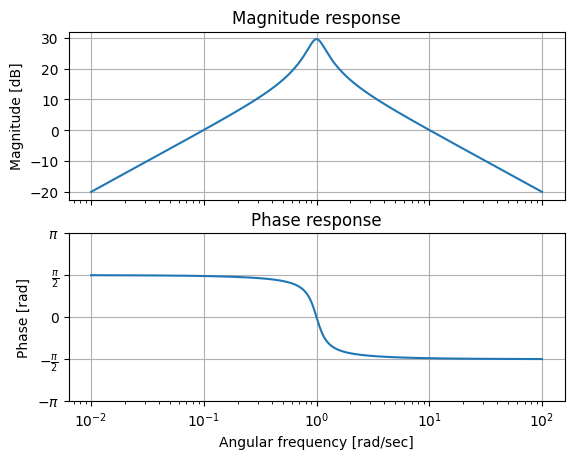

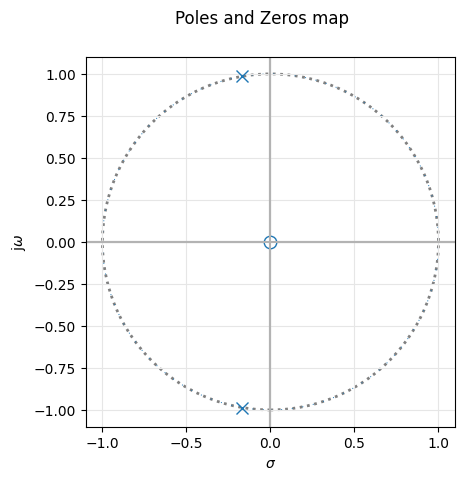

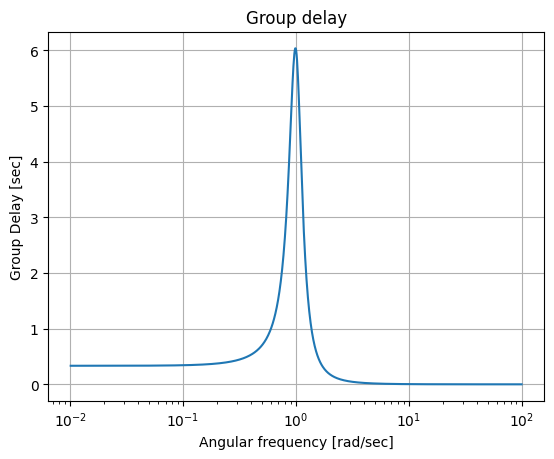

In [6]:
#Filtro Pasabanda
TFPBand=TransferFunction([1/(C*R1), 0], [1, w0/Q[0], w0**2])
bodePlot(TFPBand, fig_id=8 )
pzmap(TFPBand, fig_id=9 )
GroupDelay(TFPBand, fig_id=10 )

### Conclusiones

El circuito Ackerberg-Mossberg es muy útil para implementar pasabajos y pasabandas ya que tiene una función transferencia simple que permite trabajar modificando los valores de R1, R2, R3 y los C para determinar los valores deseados de Q y fc. Frente al circuito Tow-Thomas, tiene integradores que funcionan mejor para altas frecuencias.

Por otro lado, es importante mencionar que para el circuito Ackerberg-Mossberg la sensibilidad de Q es directamente proporcional a variaciones de R2 e inversamente proporcional a variaciones de R3. Además $\omega0$ es sensible a variaciones de C de manera directamente proporcional. Es necesario tener en cuenta las sensibilidades ya que al usar componentes con cierta incertidumbre, las características del filtro podrían verse afectadas.